In [1]:
import numpy as np
import pysal.lib as ps
from pysal.model.mgwr.gwr import GWR, MGWR
from pysal.model.mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

/Users/weikang/Google Drive (weikang@ucr.edu)/python_repos/pysal-refactor/pysal.lib/pysal.lib/io/iohandlers/__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


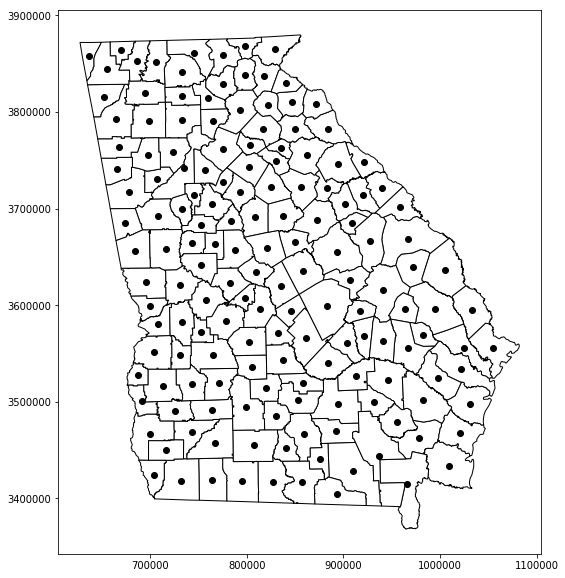

In [3]:
#Load Georgia dataset and generate plot of Georgia counties (figure 1)
georgia = gp.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize=(10,10))
georgia.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia.centroid.plot(ax=ax, c='black')

In [4]:
#Prepare Georgia dataset inputs
y = georgia['PctBach'].values.reshape((-1,1))
X = georgia[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia['X']
v = georgia['Y']
coords = list(zip(u,v))

np.random.seed(908)
sample = np.random.choice(range(159), 10)
mask = np.ones_like(y,dtype=bool).flatten()
mask[sample] = False

cal_coords = coords[mask]
cal_y = y[mask]
cal_X = X[mask]

pred_coords = coords[~mask]
pred_y = y[~mask]
pred_X = X[~mask]

In [5]:
#Calibrate GWR model

gwr_selector = Sel_BW(cal_coords, cal_y, cal_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
model = GWR(cal_coords, cal_y, cal_X, gwr_bw)
gwr_results = model.fit()

109.0


In [6]:
scale = gwr_results.scale
residuals = gwr_results.resid_response

pred_results = model.predict(pred_coords, pred_X, scale, residuals)

In [7]:
pred_results.predictions

array([[12.17204646],
       [17.23453734],
       [10.77131683],
       [13.70057966],
       [ 4.29466558],
       [ 9.54432956],
       [ 7.57597975],
       [20.24941349],
       [10.82796502],
       [ 7.10512614]])

In [8]:
pred_y

array([[ 9.2],
       [18.6],
       [ 9.4],
       [13.7],
       [ 6.8],
       [ 7.7],
       [ 4.6],
       [16.6],
       [ 9.5],
       [ 5.6]])

In [9]:
np.corrcoef(pred_results.predictions.flatten(), pred_y.flatten())[0][1]

0.9142492684278577